In [3]:
# Data preparation - loading Data sample (GOOGLE)
# Time span 2010-01-01 to 2017-12-31
import quandl 
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
google = quandl.get('WIKI/GOOGL', start_date = '2010-01-01', end_date = '2017-12-31')
google.head(10)
#sp500 = pdr.get_data_yahoo('^GSPC', start= '2010-01-01', end= '2018-8-31')

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,626.95,629.51,624.24,626.75,3908400.0,0.0,1.0,314.445664,315.729627,313.086468,314.345354,3908400.0
2010-01-05,627.18,627.84,621.54,623.99,6003300.0,0.0,1.0,314.561020,314.892042,311.732288,312.961081,6003300.0
2010-01-06,625.86,625.86,606.36,608.26,7949400.0,0.0,1.0,313.898976,313.898976,304.118786,305.071727,7949400.0
2010-01-07,609.40,610.00,592.65,594.10,12815700.0,0.0,1.0,305.643492,305.944421,297.242559,297.969804,12815700.0
2010-01-08,592.00,603.25,589.11,602.02,9439100.0,0.0,1.0,296.916553,302.558971,295.467079,301.942066,9439100.0
2010-01-11,604.46,604.46,594.04,601.11,14411300.0,0.0,1.0,303.165844,303.165844,297.939711,301.485657,14411300.0
2010-01-12,598.08,598.16,588.00,590.48,9696800.0,0.0,1.0,299.965966,300.006090,294.910360,296.154200,9696800.0
2010-01-13,576.49,588.38,573.90,587.09,12980200.0,0.0,1.0,289.137540,295.100948,287.838530,294.453951,12980200.0
2010-01-14,583.90,594.20,582.81,589.85,8471700.0,0.0,1.0,292.854012,298.019959,292.307325,295.838224,8471700.0


In [4]:
data = google[['Adj. Close']].copy()
data = pd.DataFrame(data)
data.rename(columns = {'Adj. Close':'Price'}, inplace = True)
#data.set_index('Date', inplace = True)


In [5]:
#return calculation
data['returns'] = np.log(data['Price']/data['Price'].shift(1))
data['position'] = np.sign(data['returns']) #重要函数，向量化

In [6]:
#strategy : one-day period
data['strategy'] = data['position'].shift(1)*data['returns'] #避免未来函数的使用

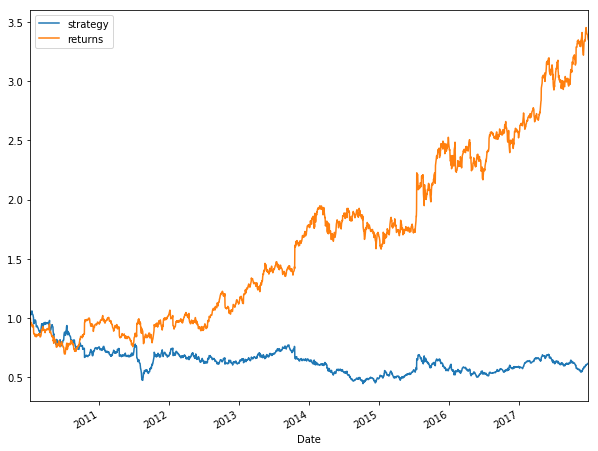

In [48]:
#strategy visualization
data[['strategy','returns']].cumsum().apply(np.exp).plot(figsize = (10,8))

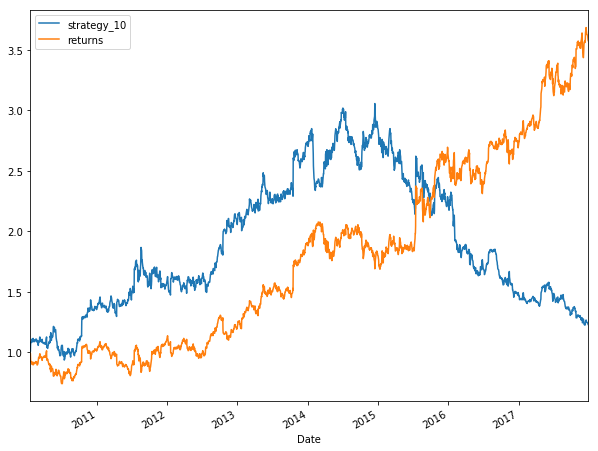

In [7]:
# strategy optimizaiton  changing position too frequently ??
data['position_10'] = np.sign(data['returns'].rolling(window = 10).mean())
data['strategy_10'] = data['position_10'].shift(1) * data['returns']
data[['strategy_10','returns']].dropna().cumsum().apply(np.exp).plot(figsize = (10,8))

In [19]:
#parameter optimization with discrete returns
data['returns_dis'] = data['Price']/data['Price'].shift(1) -1
#data['returns_ds'] = data['Prcie'].pct_change
data['returns_dis_cum'] = (data['returns_dis']+1).cumprod()
price_plot = ['returns_dis_cum'] # a list used for plot price
type(price_plot)

list

In [78]:
data.head()

,Price,returns,position,strategy,position_10,strategy_10,returns_dis,returns_dis_cum,position_20d,strategy_20d,stry_cumret_20d,position_40d,strategy_40d,stry_cumret_40d,position_80d,strategy_80d,stry_cumret_80d
Date,,,,,,,,,,,,,,,,,
2010-01-04,314.345354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,-1,NaN,NaN,-1,NaN,NaN
2010-01-05,312.961081,-0.004413,-1.0,NaN,NaN,NaN,-0.004404,0.995596,-1,0.004413,1.004413,-1,0.004413,1.004413,-1,0.004413,1.004413
2010-01-06,305.071727,-0.025532,-1.0,0.025532,NaN,NaN,-0.025209,0.970499,-1,0.025532,1.030058,-1,0.025532,1.030058,-1,0.025532,1.030058
2010-01-07,297.969804,-0.023555,-1.0,0.023555,NaN,NaN,-0.023280,0.947906,-1,0.023555,1.054321,-1,0.023555,1.054321,-1,0.023555,1.054321
2010-01-08,301.942066,0.013243,1.0,-0.013243,NaN,NaN,0.013331,0.960542,-1,-0.013243,1.040358,-1,-0.013243,1.040358,-1,-0.013243,1.040358


In [20]:
for days in [20,40,80]:
    price_plot.append('stry_cumret_%dd' % days)
    data['position_%dd' % days] = np.where(data['returns'].rolling(days).mean()>0,1,-1)
    data['strategy_%dd' % days] = data['position_%dd' % days].shift(1) * data['returns']
    data['stry_cumret_%dd' % days] = (data['strategy_%dd' % days] +1).cumprod()

In [21]:
price_plot

['returns_dis_cum', 'stry_cumret_20d', 'stry_cumret_40d', 'stry_cumret_80d']

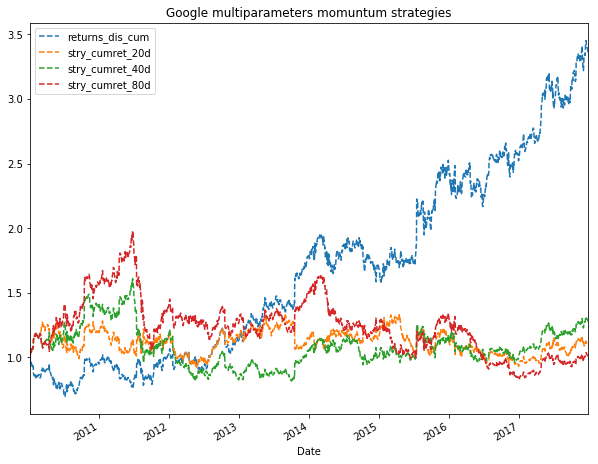

In [26]:
data[price_plot].dropna().plot(
    title = 'Google multiparameters momuntum strategies',
    figsize = (10,8), style = ['--','--','--','--','--'])